In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import GRU, Dense
from tabulate import tabulate
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [4]:
url = 'https://raw.githubusercontent.com/CallMePo/Final-Project-PMA/master/KepRiau%202015%20-%202022.csv'
df = pd.read_csv(url)
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


In [5]:
train_datetime=pd.to_datetime(df['datetime'])
train_datetime

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]

In [26]:
features = df[['total_accomodation']]
target = df['total_visitor']

Train Test size  80 : 20

In [40]:
from sklearn.svm import SVR
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr_model = SVR(C=0.1, epsilon=0.01, kernel='rbf')  # Adjust hyperparameters as needed

# Train SVR model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR MAPE:", f"{mape_svr:.2f}%")

SVR MSE: 10065922822.03698
SVR MAPE: 53.95%


Train Test size  70 : 30

In [43]:
from sklearn.svm import SVR
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr_model = SVR(C=0.1, epsilon=0.01, kernel='rbf')  # Adjust hyperparameters as needed

# Train SVR model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR MAPE:", f"{mape_svr:.2f}%")

SVR MSE: 9408261265.825977
SVR MAPE: 73.41%


Train test size 60 : 40

In [44]:
from sklearn.svm import SVR
# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVR model
svr_model = SVR(C=0.1, epsilon=0.01, kernel='rbf')  # Adjust hyperparameters as needed

# Train SVR model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
mse_svr = mean_squared_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)

print("SVR MSE:", mse_svr)
print("SVR MAPE:", f"{mape_svr:.2f}%")

SVR MSE: 7251703445.562955
SVR MAPE: 52.59%


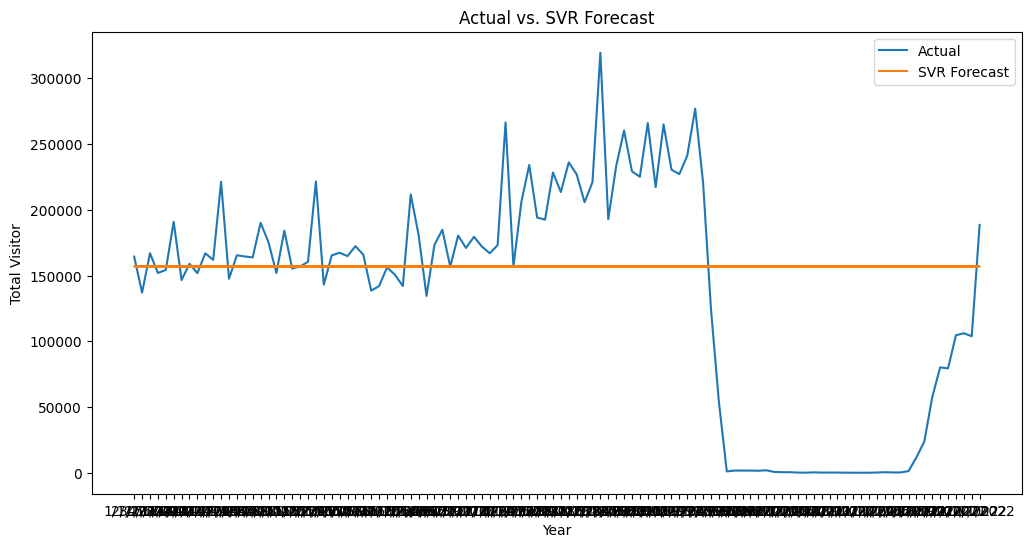

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['total_visitor'], label='Actual',)
plt.plot(X_test.index, y_pred_svr, label='SVR Forecast', )  # Adjust X_test index based on your data
plt.title('Actual vs. SVR Forecast')
plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()